In [1]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

from pydeseq2.utils import build_design_matrix
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.default_inference import DefaultInference
#from pydeseq2.ds import DeseqStats

In [39]:
# Loading the data from package

In [2]:
# Test simulated data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv.csv"), index_col=0)
cnv = cnv.T

In [56]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/lung_cancer/LUAD/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_test_3.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_3.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_test_3.csv"), index_col=0)
cnv = cnv.T

In [28]:
#design_matrix = build_design_matrix(
    #metadata=metadata,
    #design_factors="condition",
    #expanded=False,
    #intercept=True
#)
#design_matrix = design_matrix.values
#design_matrix.shape

(40, 2)

In [4]:
#num_vars = design_matrix.shape[1]
#X = design_matrix

In [3]:
from dds import pydeseq2CN_data
from inference import Inference
from def_inference import DefInference
import utils_pydeseq2CN

In [4]:
inference = DefInference(n_cpus=8)
dds = pydeseq2CN_data(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference
)

In [5]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.01 seconds.



In [6]:
dds.obsm["size_factors"]

array([1.0817345 , 1.10680092, 1.01007732, 1.0496627 , 1.03442905,
       1.03982867, 1.04228893, 1.06156191, 1.03024459, 1.04868554,
       0.98184938, 1.05550931, 1.07347973, 1.03528044, 0.94830907,
       1.04864958, 1.01057704, 1.01872342, 1.0096696 , 1.01212212])

In [7]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 0.11 seconds.



In [8]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/dds.py:830: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1 / self.varm["_normed_means"][self.non_zero_idx],
... done in 0.04 seconds.



In [9]:
#dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

array([0.2698452 , 0.42915043, 0.48835948, 0.46681993, 0.37671163,
       0.29274575, 0.37020772, 0.44252186, 0.27795472, 0.28831943,
       0.29951693, 0.30746877, 0.31413904, 0.37777007, 0.31067073,
       0.40958147, 0.57379468, 0.29383967, 0.31668599, 0.29156613,
       0.78070822, 0.35782066, 0.29292005, 0.29847968, 0.28506376,
       0.33526907, 0.29192474, 0.32562206, 0.3062177 , 0.43797442,
       0.27758011, 0.30327846, 0.46175096, 1.21305008, 0.3622365 ,
       0.2816541 , 0.32077597, 0.30476214, 0.68486629, 0.28064334,
       0.29522515, 0.39331637, 0.27583818, 0.52436921, 0.31395892,
       0.28878067, 0.27847069, 0.39132923, 0.36969363, 0.32008763,
       0.29643912, 0.31807628, 0.27905976, 0.29321562, 0.39130641,
       0.28736698, 0.36859887, 0.29647406, 0.28543826, 0.39385883,
       0.36590394, 0.27431983, 0.28779609, 0.29477949, 0.39461517,
       0.34224826, 0.43104419, 0.30845784, 0.29569621, 0.29567483,
       0.33532677, 0.38738963, 0.3685755 , 0.29827633, 0.28769

In [10]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.13221932469676065, sigma_prior=0.25


In [11]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 0.15 seconds.



ValueError: NumPy boolean array indexing assignment cannot assign 1000 input values to the 9 output values where the mask is true

In [12]:
dds.varm["MAP_dispersions"]

array([0.39839683, 0.5642002 , 0.64036219, 0.40935756, 0.36427741,
       0.27136173, 0.47004603, 0.35638694, 0.27680952, 0.40523469,
       0.41883527, 0.32233591, 0.37491339, 0.37917558, 0.49532396,
       0.44161367, 0.64603768, 0.63144326, 0.33053598, 0.40009283,
       0.62220705, 0.43743277, 0.38448543, 0.55015625, 0.28951994,
       0.41591246, 0.42235746, 0.31269874, 0.44699111, 0.64723717,
       0.37236404, 0.34377558, 0.52923185, 1.4605687 , 0.32681282,
       0.17969053, 0.307552  , 0.40714411, 1.01948158, 0.42331818,
       0.40869736, 0.49920006, 0.40796034, 0.60922052, 0.44511941,
       0.49182227, 0.26181333, 0.34458715, 0.30131554, 0.35107647,
       0.31681545, 0.51820163, 0.35144748, 0.42953804, 0.37058987,
       0.30118525, 0.5579128 , 0.39661274, 0.29399864, 0.57415689,
       0.40630641, 0.34302961, 0.2183825 , 0.37346562, 0.43560379,
       0.56188595, 0.53520773, 0.46902232, 0.26816441, 0.33159603,
       0.42113196, 0.37772986, 0.46677254, 0.30200388, 0.17521

In [13]:
dds.varm["dispersions"]

array([0.39839683, 0.5642002 , 0.64036219, 0.40935756, 0.36427741,
       0.27136173, 0.47004603, 0.35638694, 0.27680952, 0.40523469,
       0.41883527, 0.32233591, 0.37491339, 0.37917558, 0.49532396,
       0.44161367, 0.64603768, 0.63144326, 0.33053598, 0.40009283,
       0.62220705, 0.43743277, 0.38448543, 0.55015625, 0.28951994,
       0.41591246, 0.42235746, 0.31269874, 0.44699111, 0.64723717,
       0.37236404, 0.34377558, 0.52923185, 1.4605687 , 0.32681282,
       0.17969053, 0.307552  , 0.40714411, 1.01948158, 0.42331818,
       0.40869736, 0.49920006, 0.40796034, 0.60922052, 0.44511941,
       0.49182227, 0.26181333, 0.34458715, 0.30131554, 0.35107647,
       0.31681545, 0.51820163, 0.35144748, 0.42953804, 0.37058987,
       0.30118525, 0.5579128 , 0.39661274, 0.29399864, 0.57415689,
       0.40630641, 0.34302961, 0.2183825 , 0.37346562, 0.43560379,
       0.56188595, 0.53520773, 0.46902232, 0.26816441, 0.33159603,
       0.42113196, 0.37772986, 0.46677254, 0.30200388, 0.17521

In [40]:
#design_matrix = dds.obsm["design_matrix"]
#design_matrix = design_matrix.values

In [15]:
#beta = (6.47867033, 0.06064821)
#beta = np.array(beta)
#beta

array([6.47867033, 0.06064821])

In [16]:
#beta.shape[0]
#design_matrix.shape[1]

2

In [22]:
#if beta.shape[0] != design_matrix.shape[1]:
    #beta = beta.reshape(design_matrix.shape[1], -1)

In [14]:
dds.fit_LFC()

Fitting LFCs...
... done in 0.09 seconds.



In [15]:
dds.varm["LFC"]

,intercept,condition_B_vs_A
G1,8.652171,0.383312
G2,4.091364,0.322361
G3,3.608694,0.615972
G4,4.055547,-0.020018
G5,4.449594,0.391194
...,...,...
G996,5.624118,0.004589
G997,7.123946,-0.185350
G998,5.795290,0.343472
G999,6.147894,-0.429982


In [39]:
# Check relevant data properties
#print("Counts shape:", counts_df.shape)
#print("CNV shape:", cnv.shape)
#print("non_zero_idx shape:", non_zero_idx.shape)
#print("non_zero_idx content (first 10):", non_zero_idx[:10])

In [40]:
# Check compatibility
#if isinstance(non_zero_idx, (np.ndarray, pd.Series)):
    #if non_zero_idx.max() >= counts_df.shape[1]:
        #print("Error: Index exceeds data dimensions.")
    #else:
        #print("Indexing looks valid.")

In [41]:
#if isinstance(counts_df, pd.DataFrame):
    #print(counts_df.columns)
#if isinstance(cnv, pd.DataFrame):
    #print(cnv.columns)

In [ ]:
# Statistical test

In [16]:
import dds_stat
from dds_stat import pydeseq2CN_Stats

In [17]:
# Statistical analysis
stat_res = pydeseq2CN_Stats(dds, alpha=0.05, independent_filter=True)

In [18]:
stat_res.run_wald_test()

Running Wald tests...
... done in 0.06 seconds.



In [19]:
stat_res.p_values

G1       0.174561
G2       0.343113
G3       0.090107
G4       0.945342
G5       0.152464
           ...   
G996     0.983776
G997     0.360797
G998     0.111801
G999     0.029991
G1000    0.378324
Length: 1000, dtype: float64

In [20]:
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1588: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]


G1       0.805851
G2       0.896811
G3       0.747551
G4       0.997686
G5       0.805851
           ...   
G996     0.997686
G997     0.896988
G998     0.780733
G999     0.623820
G1000    0.896988
Name: 0, Length: 1000, dtype: float64

In [21]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
G1     5483.345668        0.553002  0.407310  1.357694  0.174561  0.805851
G2       53.273471        0.465069  0.490562  0.948032  0.343113  0.896811
G3       38.940902        0.888659  0.524334  1.694834  0.090107  0.747551
G4       43.165640       -0.028880  0.421251 -0.068557  0.945342  0.997686
G5       79.037687        0.564374  0.394424  1.430882  0.152464  0.805851
...            ...             ...       ...       ...       ...       ...
G996    448.120920        0.006620  0.325549  0.020335  0.983776  0.997686
G997   1593.890327       -0.267404  0.292613 -0.913847  0.360797  0.896988
G998    641.953647        0.495526  0.311622  1.590150  0.111801  0.780733
G999    523.254006       -0.620333  0.285841 -2.170206  0.029991  0.623820
G1000   882.841110       -0.279543  0.317306 -0.880988  0.378324  0.896988

[1000 rows x 6 columns]


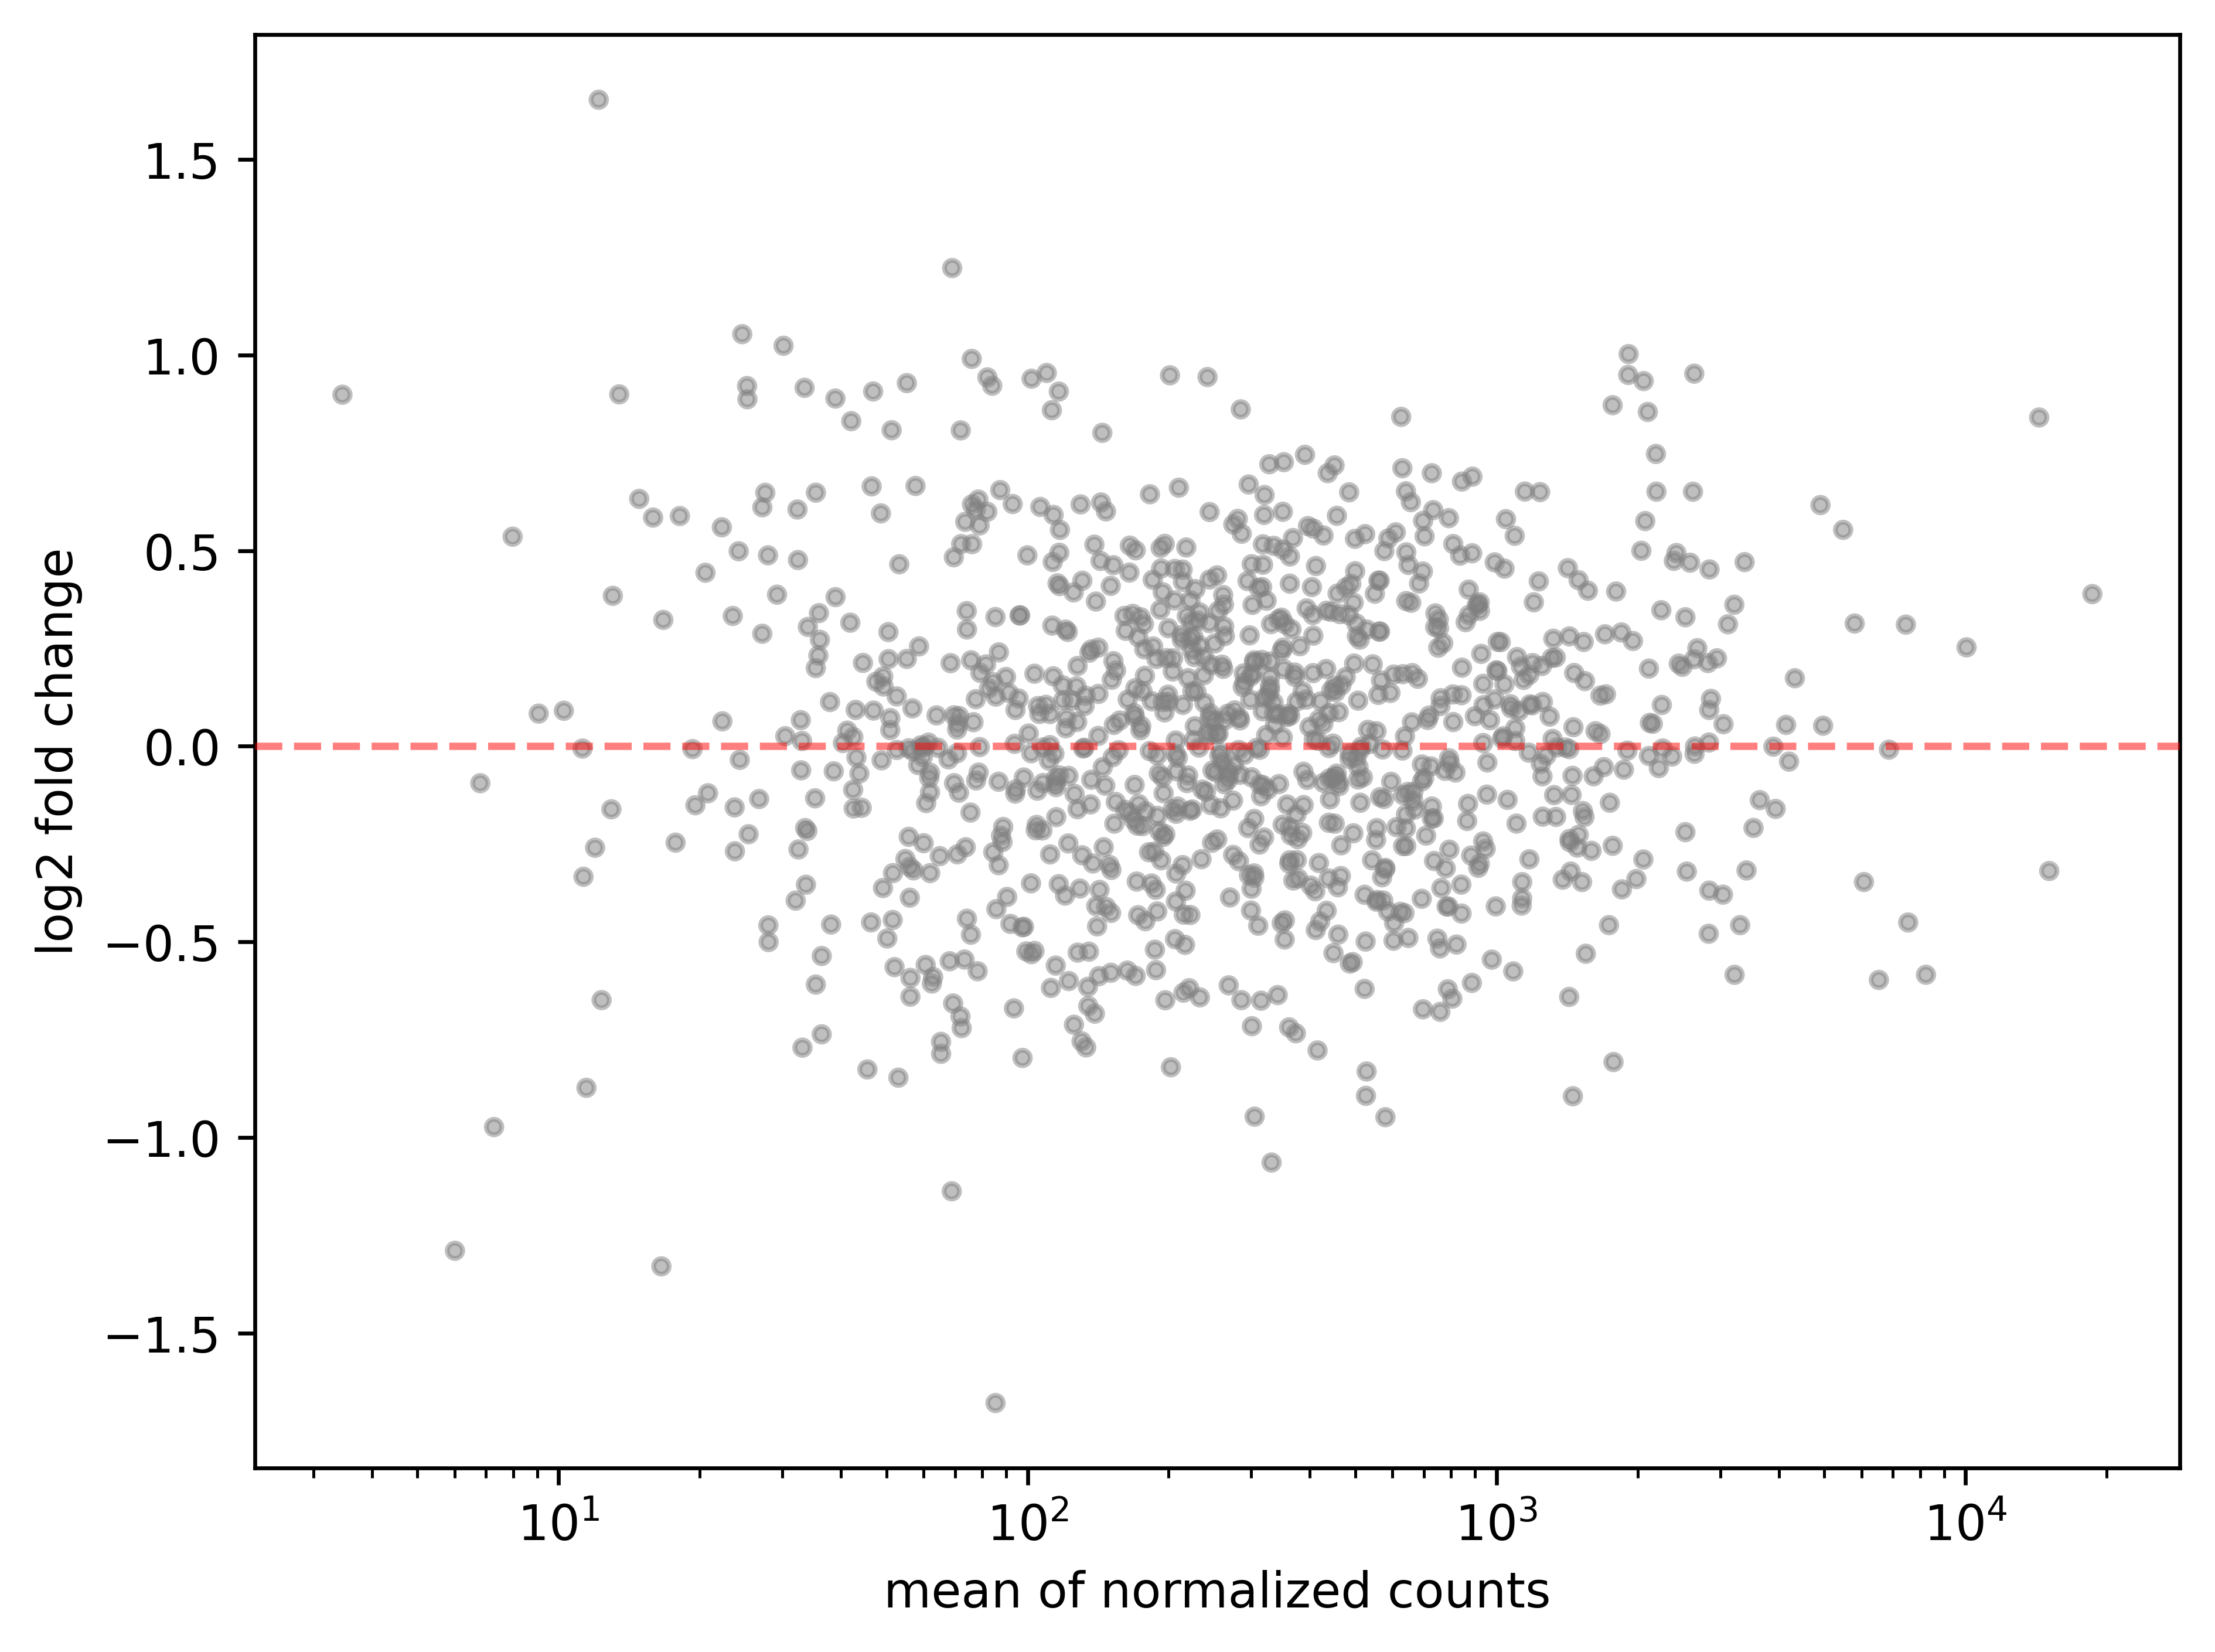

In [22]:
stat_res.plot_MA(s=10)

In [24]:
stat_res.lfc_shrink(coeff="condition_B_vs_A")

Shrunk log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
G1     5483.345668        0.016045  0.151869  1.357694  0.174561  0.805851
G2       53.273471        0.001630  0.153130  0.948032  0.343113  0.896811
G3       38.940902        0.022766  0.170546  1.694834  0.090107  0.747551
G4       43.165640       -0.041077  0.152014 -0.068557  0.945342  0.997686
G5       79.037687        0.005944  0.150336  1.430882  0.152464  0.805851
...            ...             ...       ...       ...       ...       ...
G996    448.120920       -0.078676  0.177775  0.020335  0.983776  0.997686
G997   1593.890327       -0.116357  0.219768 -0.913847  0.360797  0.896988
G998    641.953647       -0.000257  0.143091  1.590150  0.111801  0.780733
G999    523.254006       -0.808223  0.304510 -2.170206  0.029991  0.623820
G1000   882.841110       -0.113245  0.223793 -0.880988  0.378324  0.896988

[1000 rows x 6 columns]


Fitting MAP LFCs...
... done in 0.18 seconds.

/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/dds_stat.py:427: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True

In [25]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
G1     5483.345668        0.016045  0.151869  1.357694  0.174561  0.805851
G2       53.273471        0.001630  0.153130  0.948032  0.343113  0.896811
G3       38.940902        0.022766  0.170546  1.694834  0.090107  0.747551
G4       43.165640       -0.041077  0.152014 -0.068557  0.945342  0.997686
G5       79.037687        0.005944  0.150336  1.430882  0.152464  0.805851
...            ...             ...       ...       ...       ...       ...
G996    448.120920       -0.078676  0.177775  0.020335  0.983776  0.997686
G997   1593.890327       -0.116357  0.219768 -0.913847  0.360797  0.896988
G998    641.953647       -0.000257  0.143091  1.590150  0.111801  0.780733
G999    523.254006       -0.808223  0.304510 -2.170206  0.029991  0.623820
G1000   882.841110       -0.113245  0.223793 -0.880988  0.378324  0.896988

[1000 rows x 6 columns]


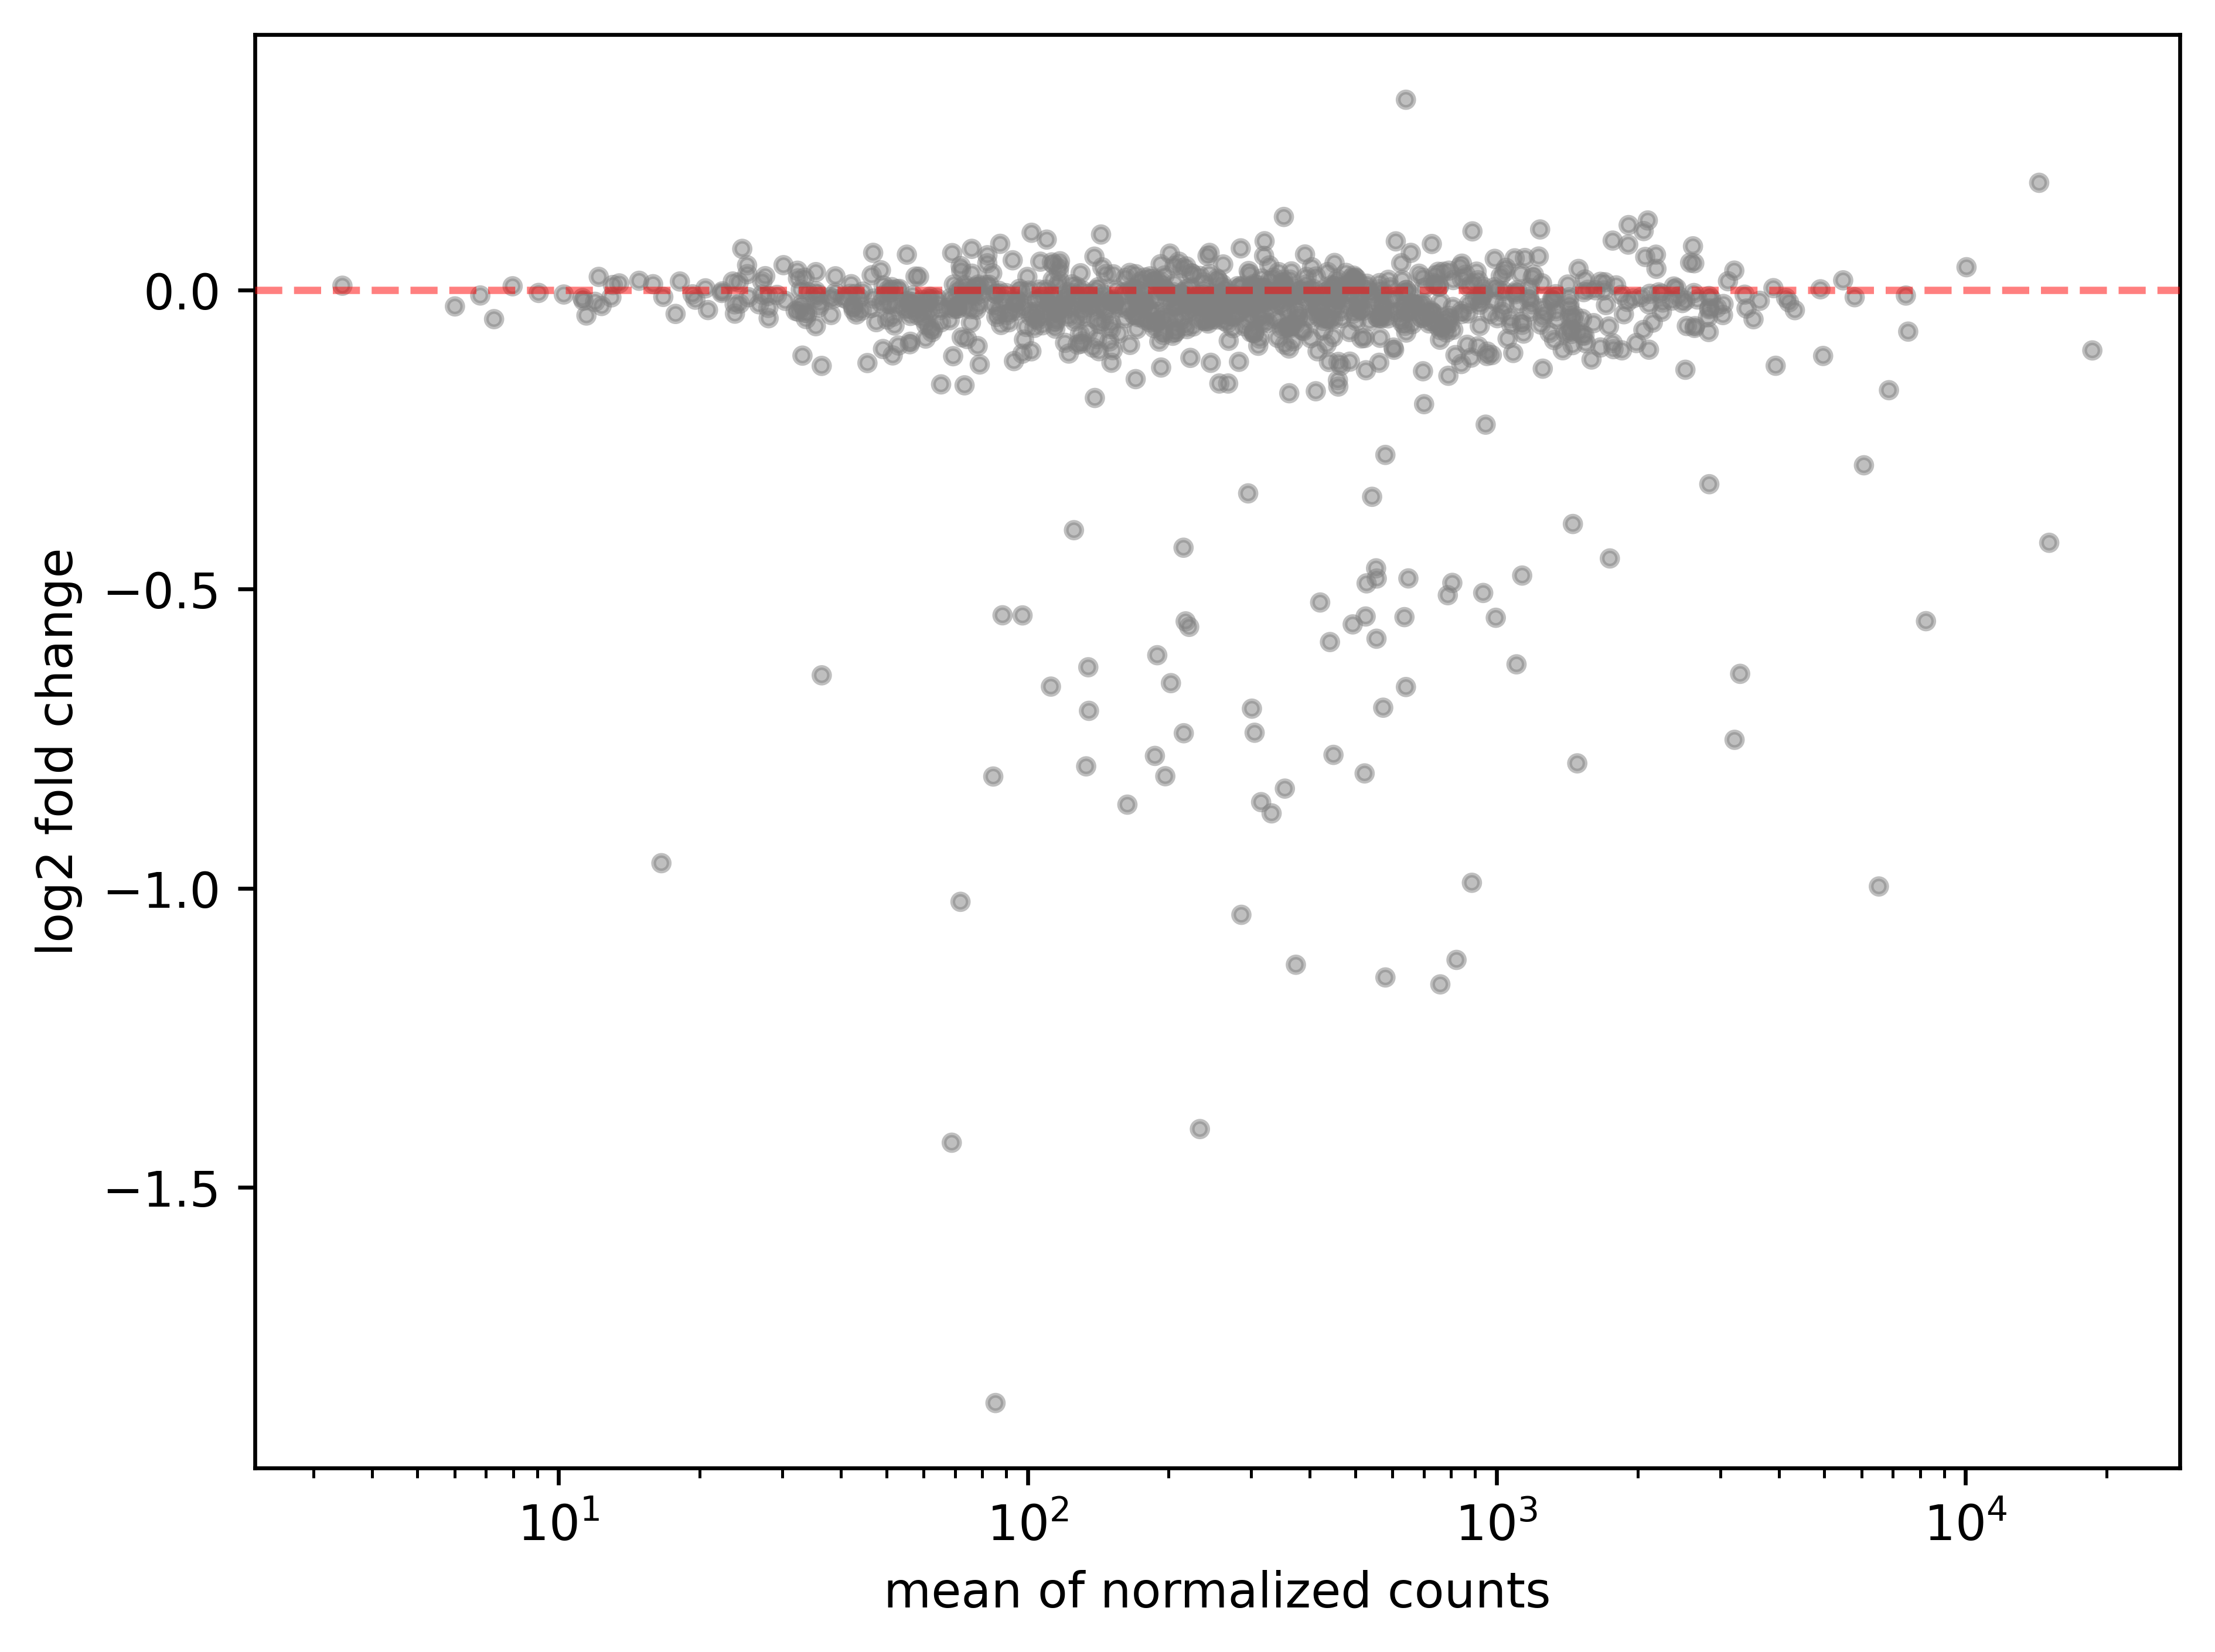

In [26]:
stat_res.plot_MA(s=10)

In [27]:
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/results"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNaware_sim_shrink.csv"))